.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

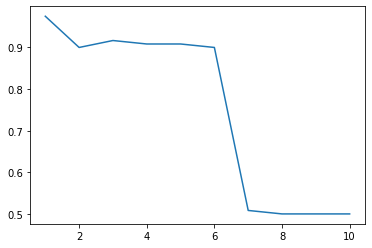

In [20]:
from sklearn import datasets

# Wczytanie zbioru irysów
iris = datasets.load_iris()

# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
# Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych

print(iris['DESCR'])

#Opis zbioru zawiera informacje dotyczące trzech klas kwiatów irysów, statystyki roślin, opis bazy tych roślin oraz bibliografię.

# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



 
lista_sasiedzi = [1, 2, 3, 4, 5 , 6, 7, 8, 9, 10]
scoring = []

a = iris.data
b = iris.target
aU, aT, bU, bT = train_test_split(a, b, test_size=0.8)
 
for n_neighb in lista_sasiedzi:
    knn = KNeighborsClassifier(n_neighb)
    

    
    knn.fit(aU, bU)
 
    scoring.append(knn.score(aT, bT))
 
print("\nSąsiedzi, Scoring")
 
for lista_sasiedzi2, scoring2 in zip(lista_sasiedzi, scoring):
    print([lista_sasiedzi2, scoring2])
    
# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.
import matplotlib.pyplot as plt

plt.plot(lista_sasiedzi, scoring)

# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej

from sklearn.datasets import load_wine

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
# Podziel zbiór danych na uczący i testowy.
# Wytrenuj klasyfikator kNN
# Dokonaj predykcji na zbiorze testowym
# Wypisz raport z uczenia: confusion_matrix oraz classification_report

wines = datasets.load_wine()

print('\nElementy zbioru win: ', list(wines.keys()))

print('\nCechy win w zbiorze: ', wines['feature_names'])


dfWines = pd.DataFrame(wines['data'], columns=wines['feature_names'])
 
# Zamiana wartości liczbowych na pełny tekst do gatunków
species = map(lambda x: wines['target_names'][x], wines['target'])
 
# Dodanie kolumny gatunki do DataFrame
dfWines['species'] = np.array(list(species))
 
#Podział zbioru na uczący oraz testowy

a = wines.data
b = wines.target
 

aU, aT, bU, bT = train_test_split(a, b, test_size = 0.8)
 
knn = KNeighborsClassifier(n_neighbors = 5)
 
# Trenowanie klasyfikatora kNN
knn.fit(aU, bU)
 
# Predykcja na zbiorze testowym

prediction = knn.predict(aT)
 
# Raport z uczenia
print("\n\nClassification report")

print(classification_report(bT, prediction))
 
print("\n\nConfusion matrix")

print(confusion_matrix(bT, prediction))